# Asignment 3
PHYS8905 - Zachary Milgate (mqg10019180)

## Question 1
### a) 
Since there are 8 items to be searched this can be performed on $2^n = 8$ qubits. Therefore $n=3$ qubits are needed.   
\begin{align}
r &\approx \frac{\pi}{4}\sqrt{2^n} - \frac{1}{2}\\
    &= 1.7214\\
k &= \lceil r \rceil\\
    &= 2
\end{align}
Grover's algorithm will require 2 iterations to find the single solution.

### b)
The initial state is the superposition state expressed $\ket{\psi}$ and Grover's Algorithm can be mathematically expressed as the unitary $U_g$
\begin{align}
\ket{\psi} &= \cos{\theta}\ket{\phi_{\perp}} + \sin{\vartheta}\ket{a}\\
U_g &= (2\ket{\phi}\bra{\phi} - I)(I-2\ket{a}\bra{a})
\end{align}

After one iteration:

\begin{align}
U_g\ket{\phi} &= \cos{\vartheta +2\theta}\ket{\phi_{\perp}} + \sin{\vartheta +2\theta}\ket{a}\\
\end{align}

After the second iteration we end up with:
\begin{align}
U_gU_g\ket{\phi} &= \cos{\vartheta +4\theta}\ket{\phi_{\perp}} + \sin{\vartheta +4\theta}\ket{a}\\
&= \cos{5\theta}\ket{\phi_{\perp}} + \sin{5\theta}\ket{a}\\
\end{align}

Since $\sin{\theta} = 1/\sqrt{2^n}$ and $n=3$ => $\theta=0.361$
\begin{align}
U_gU_g\ket{\phi} &= -0.233\ket{\phi_{\perp}} + 0.972\ket{a}\\
\end{align}


### c)
The following circuit is created using qiskit which runs Grover's algorithm twice. 

In [209]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

import qiskit as qk
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library.standard_gates import ZGate,XGate,IGate

In [210]:
n = 4
q = qk.QuantumRegister(n)

cccnot = XGate().control(3)
ccz = ZGate().control(2)

oracleCirc = QuantumCircuit(n)
oracleCirc.x([0,2])
oracleCirc.append(cccnot,range(4))
oracleCirc.x([0,2])
oracleGate = oracleCirc.to_gate(label="f(x)")

amplifCirc = QuantumCircuit(q)
amplifCirc.h(q[0:3])
amplifCirc.x(q[0:3])
amplifCirc.append(ccz,[0,1,2])
amplifCirc.x(q[0:3])
amplifCirc.h(q[0:3])


initialiseCirc = QuantumCircuit(q) 
#initialise circuit to |0001>
initialiseCirc.x(q[3])
initialiseCirc.barrier()
#create superposition state 
initialiseCirc.h(q[0:4])


groverCirc= QuantumCircuit(q) 
groverCirc.compose(initialiseCirc, inplace=True)
groverCirc.append(oracleGate,q[0:4])
groverCirc.compose(amplifCirc, inplace=True)
groverCirc.append(oracleGate,q[0:4])
groverCirc.compose(amplifCirc, inplace=True)
groverCirc.draw()



░ ┌───┐┌───────┐┌───┐┌───┐   ┌───┐┌───┐┌───────┐┌───┐┌───┐   »
q1905_0: ──────░─┤ H ├┤0      ├┤ H ├┤ X ├─■─┤ X ├┤ H ├┤0      ├┤ H ├┤ X ├─■─»
               ░ ├───┤│       │├───┤├───┤ │ ├───┤├───┤│       │├───┤├───┤ │ »
q1905_1: ──────░─┤ H ├┤1      ├┤ H ├┤ X ├─■─┤ X ├┤ H ├┤1      ├┤ H ├┤ X ├─■─»
               ░ ├───┤│  f(x) │├───┤├───┤ │ ├───┤├───┤│  f(x) │├───┤├───┤ │ »
q1905_2: ──────░─┤ H ├┤2      ├┤ H ├┤ X ├─■─┤ X ├┤ H ├┤2      ├┤ H ├┤ X ├─■─»
         ┌───┐ ░ ├───┤│       │└───┘└───┘   └───┘└───┘│       │└───┘└───┘   »
q1905_3: ┤ X ├─░─┤ H ├┤3      ├───────────────────────┤3      ├─────────────»
         └───┘ ░ └───┘└───────┘                       └───────┘             »
«         ┌───┐┌───┐
«q1905_0: ┤ X ├┤ H ├
«         ├───┤├───┤
«q1905_1: ┤ X ├┤ H ├
«         ├───┤├───┤
«q1905_2: ┤ X ├┤ H ├
«         └───┘└───┘
«q1905_3: ──────────
«

### d) 
To calculate the function $f(x)$ $X$ gates are applied before and after the CCCNOT gate where the qubits are $0$ of the desired outcome $\ket{a}$. For example if Grover's algorithm was searching for the state $\ket{010}$ $X$ gates would be required on the first and third qubits. A circuit diagram the oracle for $\ket{a}$ is shown below:

In [211]:
oracleCirc.draw()

┌───┐     ┌───┐
q_0: ┤ X ├──■──┤ X ├
     └───┘  │  └───┘
q_1: ───────■───────
     ┌───┐  │  ┌───┐
q_2: ┤ X ├──■──┤ X ├
     └───┘┌─┴─┐└───┘
q_3: ─────┤ X ├─────
          └───┘

## Question 2

### a)
To find the values of $b$ that would be eliminated from $N=15$ we calculate $\mathrm{gcd}(b.N)$ for all $1<b<N$ 

In [212]:
# Start with an N which is a product of primes.
N=15
notCoprime = []
coprime = []
for b in range(2,N):
    g=np.gcd(b,N)
    if g>1:
        notCoprime.append(b)
    else:
        coprime.append(b)
print("The values of b that are not coprime with N=15 are", notCoprime)

The values of b that are not coprime with N=15 are [3, 5, 6, 9, 10, 12]


### b)
To find the periods of the values of $b$ that are coprime with N we iterate through the function $f(x)$ for increasing values of $x$ until we find $r$ or the period of each coprime.

In [213]:
coprime = np.array(coprime, dtype=int)
periods = np.zeros(coprime.shape, dtype=int)
x = 1
while (periods == 0).any():
    fx = (coprime**x)%N
    periods[(periods ==0)&(fx ==1)] = x
    x = x+ 1
print("For the coprimes",coprime,"the respective periods are r=",periods)


For the coprimes [ 2  4  7  8 11 13 14] the respective periods are r= [4 2 4 4 2 4 2]


### c)
To find the value to eliminate we calculate the result of the boolean function $(b^{r/2} + 1) \% N == 1$ for the periods found above for each of the coprimes.

In [214]:
bhalfr = (coprime[:,None]**(periods/2)).diagonal().astype(int)
bElim = (bhalfr+1)%N == 0
print("The value to be eliminated is b=",coprime[bElim])

The value to be eliminated is b= [14]


### d)
$\mathrm{gcd}(b^{r/2}+1)$ and $\mathrm{gcd}(b^{r/2}-1)$ are the factors of the input N. However, when performed on a quantum computer they have a probability of being measured thus not always giving the outcome.

In [215]:
pos = np.gcd(np.delete(bhalfr, np.where(bElim)) + 1, N)
neg = np.gcd(np.delete(bhalfr, np.where(bElim)) - 1, N)
print(pos)
print(neg)

[5 5 5 5 3 5]
[3 3 3 3 5 3]


### e)
Since the period of $b=13$ is $r=4$ the possible values of $\frac{ay}{2^n}$ $n=4$. $y=64,128,192$

## Question 3

### a)

First the Hamiltonian is broken into $A$ and $B$. 
\begin{align}
A &= -2 Z\otimes Z\\
B &= X\otimes I + I\otimes X
\end{align}

We compare the error in the initial Hamiltonian $H$ with the approximation created from $A\& B$ using qutip.

In [216]:
N = 100
delta = 1
tau = 1
hbar = 1

A = (-2*tensor(sigmaz(),sigmaz()))
B = (tensor(sigmax(),identity([2])) + tensor(identity([2]),sigmax()))
H = A + B 

deltat = np.linspace(0,1,N)
Uerror = np.zeros(deltat.shape)


for n in range(N):
    HH=-1j*deltat[n]*H/hbar
    HA=-1j*deltat[n]*A/(2*hbar)
    HB=-1j*deltat[n]*B/hbar

    #Real Unitary
    U = HH.expm()
    #Approximate unitary
    Uapprox = HA.expm()*HB.expm()*HA.expm()

    #Determine error using the norm of the difference
    Uerror[n] = (U-Uapprox).norm()


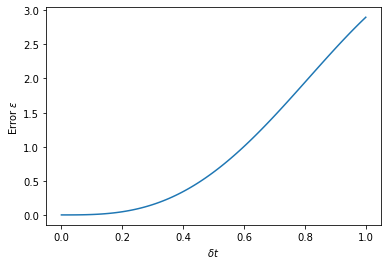

In [217]:
# Plotting the error as a function of the time interval.
plt.plot(deltat,Uerror)
plt.xlabel(r'$\delta t$')
plt.ylabel(r'Error $\epsilon$')
#plt.legend(['initial entanglement', 'final entanglement'])
plt.show()

### b)
The following function find the optimal curve that is greater than or equal to the discrete curve generated by the error of the real and approximate unitaries of the Hamiltonian $H$ that fits the function $C{\delta t}^k$

In [218]:
def optfloat(k, xs, ys):
    def curve_test(x,C):
        return C*x**k
    below = True
    boundsC = [[0], [np.inf]]
    while below:
        popt, pcov = curve_fit(curve_test, xs, ys,bounds=boundsC)
        below = (curve_test(xs, popt) - ys < 0).any()
        boundsC = [popt+0.1, [np.inf]]

    errsqr = np.linalg.norm(curve_test(xs, popt) - ys)
    return dict(errsqr=errsqr, floatcoef=popt)

def errfun(intcoef, *args):
    xs, ys = args
    return optfloat(intcoef, xs, ys)['errsqr']


from scipy.optimize import brute
grid = [slice(1, 4, 1)]  # grid search over 1, 2, ..., 4
# it is important to specify finish=None in below
intcoef = brute(errfun, grid, args=(deltat, Uerror,), finish=None)
floatcoef = optfloat(intcoef, deltat, Uerror)['floatcoef'][0]
print("The solution to the upper bound curve us: k=",intcoef,"C=",floatcoef)


The solution to the upper bound curve us: k= 2.0 C= 3.041108450773113


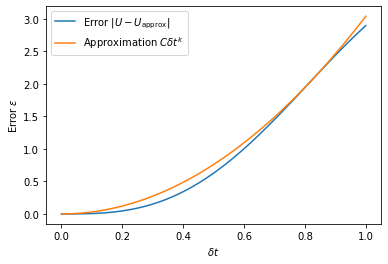

In [219]:

plt.plot(deltat,Uerror)
plt.plot(deltat,floatcoef*deltat**intcoef)
plt.xlabel(r'$\delta t$')
plt.ylabel(r'Error $\epsilon$')
plt.legend([r'Error $\|U-U_{\mathrm{approx}}\|$', r'Approximation $C{\delta t}^k$'])
plt.show()


### c)
The upper bound found above can be used to solve for values of $\delta t$ that keep the error with $\epsilon$.

\begin{align}
\epsilon &\geq C{\delta t}^k\\
\frac{\epsilon}{C} &\geq {\delta t}^k\\
\sqrt[k]{\frac{\epsilon}{C}} &\geq \delta t
\end{align}

This gives an inequality for the value of $\delta t$ that will keep the error less than or equal to epsilon. To solve for the number of intervals $n$ for a give time $t$. We substitute $\delta t = \frac{t}{n}$.
\begin{align}
\sqrt[k]{\frac{\epsilon}{C}} &\geq \frac{t}{n}\\
n &\geq \frac{t}{\sqrt[k]{\frac{\epsilon}{C}}}\\
n &\geq t\sqrt[k]{\frac{C}{\epsilon}}
\end{align}
Substituting the parameters for $C,k$ found in part b). Since $k=2$ is even but we only consider the positive case.
\begin{align}
n &\geq t\sqrt{\frac{3.0411}{\epsilon}}
\end{align}



### d)
The unitary $U=H$ can be expressed as follows: 
\begin{align}
U &= \Sigma_l \alpha_l U_l\\
\alpha_{1,2,3,4} &= 1 \\
U_{1,2} &= -\sigma_z \otimes \sigma_z\\
U_{3} &= \sigma_x \otimes I\\
U_{4} &= I \otimes \sigma_x\\
\ket{\chi} &= \frac{1}{2} (\ket{00} + \ket{01}+ \ket{10} + \ket{11})\\
&= H\otimes H \ket{00}
\end{align}

In [220]:
import qiskit as qk
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library.standard_gates import ZGate,XGate,IGate

n = 4
q = qk.QuantumRegister(n)
lcuCirc = QuantumCircuit(q)

lcuCirc.h(q[0:2])
ZZ_gate = qk.extensions.UnitaryGate(tensor(-sigmaz(),sigmaz()).data.toarray(),label="-ZxZ")
XI_gate = qk.extensions.UnitaryGate(tensor(sigmax(),identity(2)).data.toarray(),label="XxI")
IX_gate = qk.extensions.UnitaryGate(tensor(identity(2),sigmax()).data.toarray(),label="IxX")
cZZ_gate = ZZ_gate.control(2)
cXI_gate = XI_gate.control(2)
cIX_gate = IX_gate.control(2)
lcuCirc.x(q[0:2])
lcuCirc.append(cZZ_gate,[0,1,2,3])
lcuCirc.x(q[1])
lcuCirc.append(cZZ_gate,[0,1,2,3])
lcuCirc.x(q[0:2])
lcuCirc.append(cXI_gate,[0,1,2,3])
lcuCirc.x(q[1])
lcuCirc.append(cIX_gate,[0,1,2,3])

lcuCirc.h(q[0:2])

lcuCirc.draw()

┌───┐┌───┐                       ┌───┐                     ┌───┐
q1906_0: ┤ H ├┤ X ├────■─────────────■────┤ X ├───■────────────■────┤ H ├
         ├───┤├───┤    │    ┌───┐    │    ├───┤   │    ┌───┐   │    ├───┤
q1906_1: ┤ H ├┤ X ├────■────┤ X ├────■────┤ X ├───■────┤ X ├───■────┤ H ├
         └───┘└───┘┌───┴───┐└───┘┌───┴───┐└───┘┌──┴───┐└───┘┌──┴───┐└───┘
q1906_2: ──────────┤0      ├─────┤0      ├─────┤0     ├─────┤0     ├─────
                   │  -ZxZ │     │  -ZxZ │     │  XxI │     │  IxX │     
q1906_3: ──────────┤1      ├─────┤1      ├─────┤1     ├─────┤1     ├─────
                   └───────┘     └───────┘     └──────┘     └──────┘